## Assembly constituency wise expenditure on MGNREGS in Cuttack and Balangir district  of Orissa in 2019-20 through aggregation of Village level data

In [1]:
import sys
!{sys.executable} -m pip install openpyxl numpy pandas scikit-learn matplotlib

In [2]:
import math
import pandas as pd
import numpy as np
import itertools
import openpyxl 
from openpyxl import load_workbook
import matplotlib.pyplot as plt
%matplotlib inline

## Loading district level data file

[Cumulative district-wise data for Orissa](data/All_AC_Census.xlsx)

In [3]:
district_level_file = "data/All_AC_Census.xlsx"
wb = load_workbook(filename=district_level_file, data_only=True)
ws = wb['Districts'] 

In [4]:
data = ws.values
cols = next(data)[:]
data = list(data)
#idx = [r[0] for r in data]
#data = (itertools.islice(r, 1, None) for r in data)

## Data Fields

The data file contains the following columns. 
1. **District** is the name of the district given in the provided [document](data/Odisha_MGNREGS_2019-20.xlsx) 
2. **District_Name** is the corresponding names of the districts as mentioned in Census of India, 2011
3. **Expenditure** is district-wise expenditure on MGNREGS in the year 2019-20
4. **Area_T** is the total area of the district as per the census of India, 2011 handbook of the state.
5. **Area_R** is the total rural area of the district as per the census of India, 2011 handbook of the state.
6. **No_HH** is the total no. of households in the rural part of the district.
7. **TOT_P** is the total population in the rual area.
8. **TOT_WORK_AGE_POP** is 0.664 x TOT_P 
9. **P_ILL** is the number of rural illiterate population in the district.
10. **TOT_WORK_P** is the total number of rural worker population i.e. no. of individuals who worked between 0 to 12 months in the reference year. It is the sum of Main Workers (who worked more than 6 months) and Marginal Worker (who worked less than 6 months).
11. **NON_WORK_P** is the total number of rural non worker population i.e. no. of individuals who didn't work in the reference year. 
12. **Elligible_NON_WORK** is TOT_WORK_AGE_POP - TOT_WORK_P
13. **MARGWORK_P** is the number of rural marginal worker population i.e. no. of individuals who worked between 0 to 6 months in the reference year.

In [5]:
print(', '.join(cols))

District, District_Name, Expenditure, Area_T, Area_R, No_HH, TOT_P, TOT_WORK_AGE_POP, P_ILL, TOT_WORK_P, NON_WORK_P, Elligible_NON_WORK, MARGWORK_P


In [6]:
dist_df = pd.DataFrame(data, columns=cols).infer_objects()

In [7]:
dist_df

,District,District_Name,Expenditure,Area_T,Area_R,No_HH,TOT_P,TOT_WORK_AGE_POP,P_ILL,TOT_WORK_P,NON_WORK_P,Elligible_NON_WORK,MARGWORK_P
0,ANGUL,Anugul,4738.38,6375,6198.12,249733,1067275,708670.600,358206,455627,611648,253043.600,198171
1,BALESHWAR,Baleshwar,7689.49,3806,3675.32,477434,2067236,1372644.704,636895,847171,1220065,525473.704,302716
2,BARGARH,Bargarh,8666.33,5837,5759.09,336130,1331145,883880.280,461973,706885,624260,176995.280,280109
3,BHADRAK,Bhadrak,4108.08,2505,2388.57,270791,1320499,876811.336,355786,411154,909345,465657.336,128740
4,BOLANGIR,Balangir,14970.17,6575,6474.29,369273,1451616,963873.024,670959,653289,798327,310584.024,307264
5,BOUDH,Baudh,3771.62,3098,3077.28,102402,420738,279370.032,165022,212323,208415,67047.032,94667
6,CUTTACK,Cuttack,5089.70,3932,3703.07,429454,1888423,1253912.872,480445,683899,1204524,570013.872,205250
7,DEOGARH,Debagarh,3386.36,2940,2915.87,70058,290130,192646.320,108830,157390,132740,35256.320,80486
8,DHENKANAL,Dhenkanal,9623.83,4452,4383.82,253446,1075305,714002.520,339782,398386,676919,315616.520,152607
9,GAJAPATI,Gajapati,6327.98,4325,4287.95,112365,507151,336748.264,293991,267265,239886,69483.264,118144


## Map of the district-wise expenditure in Orissa/Odisha on MGNREGS (2019-20)

![Orissa District-wise Expenditure](maps/Orissa_District.jpeg)

## Feature engineering
1. **AreaR/AreaT** is the ratio of rural area and total area. It is an important variable as MGNREGS is a scheme for rural employment and therefore the expenditure on the scheme is positively related to rural area in each district.
2. **MarWkP/TotWkP** is the ratio of total marginal workers and total work population. Total marginal worker is the number of individuals who worked less than 6 months in the reference period. Therefore, the the higer the number of marginal worker in a district, more will be the expenditure on MGNREGS. 
3. **ElgNonWkP/TotWkAgP** is the ratio of total eligible non workers and total work age population. Total non worker is the number of individuals who didn't work in the previous year. However it also includes individuals who are not eligible to work. Therefore number of eligible non workers was calculated. 
4. **IllP/TotP** is the ratio of illiterate opulation and total population.

In [8]:
dist_df['AreaR/AreaT']= dist_df['Area_R']/dist_df['Area_T']

In [9]:
dist_df['MarWkP/TotWkP']= dist_df['MARGWORK_P']/dist_df['TOT_WORK_P']

In [10]:
dist_df['ElgNonWkP/TotWkAgP']= dist_df['Elligible_NON_WORK']/dist_df['TOT_WORK_AGE_POP']

In [11]:
dist_df['IllP/TotP']= dist_df['P_ILL']/dist_df['TOT_P']

In [12]:
dist_df

,District,District_Name,Expenditure,Area_T,Area_R,No_HH,TOT_P,TOT_WORK_AGE_POP,P_ILL,TOT_WORK_P,NON_WORK_P,Elligible_NON_WORK,MARGWORK_P,AreaR/AreaT,MarWkP/TotWkP,ElgNonWkP/TotWkAgP,IllP/TotP
0,ANGUL,Anugul,4738.38,6375,6198.12,249733,1067275,708670.600,358206,455627,611648,253043.600,198171,0.972254,0.434941,0.357068,0.335627
1,BALESHWAR,Baleshwar,7689.49,3806,3675.32,477434,2067236,1372644.704,636895,847171,1220065,525473.704,302716,0.965665,0.357326,0.382818,0.308090
2,BARGARH,Bargarh,8666.33,5837,5759.09,336130,1331145,883880.280,461973,706885,624260,176995.280,280109,0.986652,0.396258,0.200248,0.347049
3,BHADRAK,Bhadrak,4108.08,2505,2388.57,270791,1320499,876811.336,355786,411154,909345,465657.336,128740,0.953521,0.313119,0.531080,0.269433
4,BOLANGIR,Balangir,14970.17,6575,6474.29,369273,1451616,963873.024,670959,653289,798327,310584.024,307264,0.984683,0.470334,0.322225,0.462215
5,BOUDH,Baudh,3771.62,3098,3077.28,102402,420738,279370.032,165022,212323,208415,67047.032,94667,0.993312,0.445863,0.239994,0.392220
6,CUTTACK,Cuttack,5089.70,3932,3703.07,429454,1888423,1253912.872,480445,683899,1204524,570013.872,205250,0.941778,0.300117,0.454588,0.254416
7,DEOGARH,Debagarh,3386.36,2940,2915.87,70058,290130,192646.320,108830,157390,132740,35256.320,80486,0.991793,0.511379,0.183011,0.375108
8,DHENKANAL,Dhenkanal,9623.83,4452,4383.82,253446,1075305,714002.520,339782,398386,676919,315616.520,152607,0.984686,0.383063,0.442038,0.315987
9,GAJAPATI,Gajapati,6327.98,4325,4287.95,112365,507151,336748.264,293991,267265,239886,69483.264,118144,0.991434,0.442048,0.206336,0.579691


In [13]:
X = dist_df[['AreaR/AreaT','No_HH','IllP/TotP','MarWkP/TotWkP','ElgNonWkP/TotWkAgP']] 

In [14]:
X

,AreaR/AreaT,No_HH,IllP/TotP,MarWkP/TotWkP,ElgNonWkP/TotWkAgP
0,0.972254,249733,0.335627,0.434941,0.357068
1,0.965665,477434,0.308090,0.357326,0.382818
2,0.986652,336130,0.347049,0.396258,0.200248
3,0.953521,270791,0.269433,0.313119,0.531080
4,0.984683,369273,0.462215,0.470334,0.322225
5,0.993312,102402,0.392220,0.445863,0.239994
6,0.941778,429454,0.254416,0.300117,0.454588
7,0.991793,70058,0.375108,0.511379,0.183011
8,0.984686,253446,0.315987,0.383063,0.442038
9,0.991434,112365,0.579691,0.442048,0.206336


In [15]:
Y = (dist_df[['Expenditure']]/dist_df[['Expenditure']].sum()).values #using ratio of expenditure

In [16]:
Y

array([[0.01670161],
       [0.02710354],
       [0.03054666],
       [0.01447996],
       [0.05276613],
       [0.01329402],
       [0.01793993],
       [0.01193608],
       [0.03392161],
       [0.02230456],
       [0.10271898],
       [0.00733536],
       [0.02044455],
       [0.01183869],
       [0.04255507],
       [0.03910321],
       [0.01917747],
       [0.05202537],
       [0.01008981],
       [0.05917758],
       [0.01607082],
       [0.13249601],
       [0.05179386],
       [0.01972701],
       [0.02057133],
       [0.01922449],
       [0.04447757],
       [0.01688532],
       [0.01559061],
       [0.05770276]])

## Regression Analysis

Linear regression regresses target variable over the whole range from $(-\infty, \infty)$. 
Also, expenditure for district has a higher upper bound than expenditure for AC.
To resolve these, expenditure is scaled to domain between 0 and 1 by taking its ratio over the whole. The expenditure ratio lies between 0 and 1 and used as Y. 

Next, the expenditure ratio as p is transformed back to the domain of $(-\infty, \infty)$ by taking log-odds :

$$ y = log(\frac{p}{1-p}) $$

Note, this transforms p to the domain of $(-\infty, \infty)$ at the values of 0 and 1 respectively. Now, we can use any regression technique, since our dependant variable ranges over whole real domain. But after regression prediction, the output should be transformed back to the domain of 0 to 1 by exponentiating the log-odds: 

$$ p = \frac{1}{e^{-y} + 1} $$

Note, this transforms y back to the domain of $(0, 1)$ at the values of $(-\infty, \infty)$ respectively.

For regressing x and y, we can choose any suitable regression techniques.
Over here, we have selected [PLS (Partial Least Square) Regression](https://en.wikipedia.org/wiki/Partial_least_squares_regression), which actually finds a Linear Regression model by projecting the dependant variable and the independant variables to a new space. We can also, use Linear Regression only.


In [17]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression

class LogitRegression(PLSRegression):

    def fit(self, x, p):
        p = np.asarray(p)
        y = np.log(p / (1 - p))
        return super().fit(x, y)

    def predict(self, x):
        y = super().predict(x)
        return 1 / (np.exp(-y) + 1)

regr = LogitRegression()
regr.fit(X, Y)

LogitRegression()

In [18]:
regr.coef_ #note the coefficient of No_HH is largest while for last term is negative

array([[ 0.06433795],
       [ 0.53156461],
       [ 0.19995576],
       [ 0.26622207],
       [-0.02129568]])

In [19]:
regr.score(X,Y) # the coefficient of determination R^2 of the prediction.

0.914374109715391

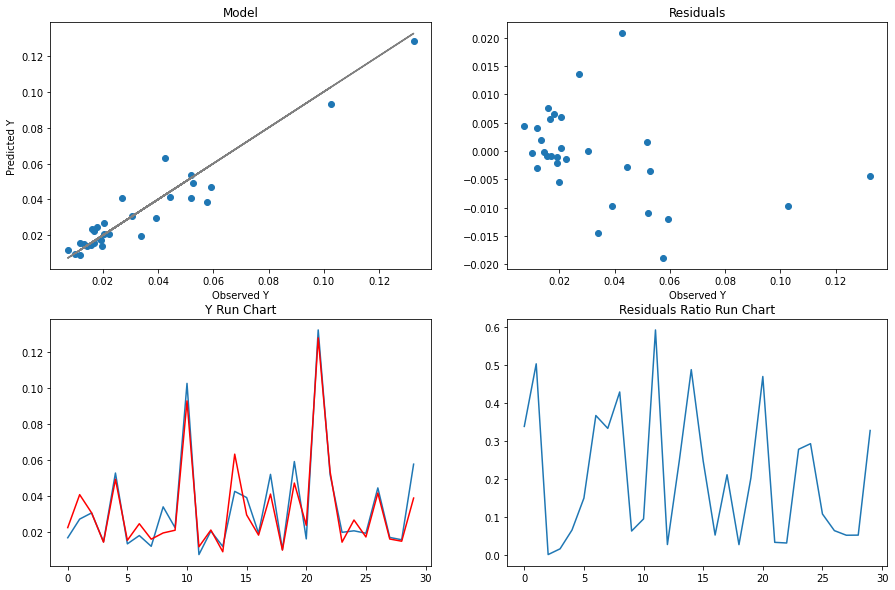

In [20]:
yPred = regr.predict(X)

residuals = yPred[:,0]-Y[:,0]
residualsratio = abs(yPred[:,0]-Y[:,0])/Y[:,0]

fig,ax = plt.subplots(2,2, figsize=(15,10))
ax[0,0].scatter(Y[:,0], yPred[:,0], marker="o")
ax[0,0].plot(Y[:,0], Y[:,0], color="grey", linestyle="-")
ax[0,1].scatter(Y[:,0], residuals)
ax[0,0].set_title("Model")
ax[0,0].set_ylabel("Predicted Y")
ax[0,0].set_xlabel("Observed Y")
ax[0,1].set_title("Residuals")
ax[0,1].set_xlabel("Observed Y")
ax[1,0].plot(Y[:,0])
ax[1,0].plot(yPred[:,0], color="red")
ax[1,0].set_title("Y Run Chart")
ax[1,1].plot(residualsratio)
text = ax[1,1].set_title("Residuals Ratio Run Chart")

## Expenditure prediction for assembly constituencies in Cuttack

In [21]:
district_level_file = "data/All_AC_Census.xlsx"
wb = load_workbook(filename=district_level_file, data_only=True)
ws = wb['All_AC_Cuttack'] 

In [22]:
data = ws.values
cols = next(data)[:]
data = list(data)
#idx = [r[0] for r in data]
#data = (itertools.islice(r, 1, None) for r in data)

## Data Fields

The data file contains the following columns. 
1. **AC_Name** is the name of Assembly Constituency(AC) in Cuttack district.
2. **Area_Map** is the total area of the AC, calculated through QGIS.
3. **Area_Sum** is the total rural area of the AC, calculated by adding up the area of the villages that was also calculated through QGIS.
4. **No_HH** is the total no. of rural households in the AC, calculated by adding up the households in the villages for the respective AC. The household data for the villages was taken from Census of India, 2011.
5. **TOT_P** is the sum of the total population of the villages in the AC.
6. **TOT_WORK_AGE_POP** is 0.664 x TOT_P 
7. **P_ILL** is the sum of illiterate population of the villages in the AC.
8. **TOT_WORK_P** is the sum of worker population i.e. no. of individuals who worked between 0 to 12 months in the reference year in the villages that come under the respective AC. It is the sum of Main Workers (who worked more than 6 months) and Marginal Worker (who worked less than 6 months).
9. **MARGWORK_P** is the sum marginal worker population i.e. no. of individuals who worked between 0 to 6 months in the reference year in the villages that come under the respective AC.
10. **NON_WORK_P** is the sum of non worker population i.e. no. of individuals who didn't work in the reference year in the villages that come under the respective AC. 
11. **Elligible_NON_WORK** is TOT_WORK_AGE_POP - TOT_WORK_P


In [23]:
print(cols)

('AC_Name', 'Area_Map', 'Area_Sum', 'No_HH', 'TOT_P', 'TOT_WORK_AGE_POP', 'P_ILL', 'TOT_WORK_P', 'MARGWORK_P', 'NON_WORK_P', 'Elligible_NON_WORK')


In [24]:
print(', '.join(cols))

AC_Name, Area_Map, Area_Sum, No_HH, TOT_P, TOT_WORK_AGE_POP, P_ILL, TOT_WORK_P, MARGWORK_P, NON_WORK_P, Elligible_NON_WORK


In [25]:
AC_df = pd.DataFrame(data, columns=cols).infer_objects()

In [26]:
AC_df

,AC_Name,Area_Map,Area_Sum,No_HH,TOT_P,TOT_WORK_AGE_POP,P_ILL,TOT_WORK_P,MARGWORK_P,NON_WORK_P,Elligible_NON_WORK
0,SALIPUR,451.984,465.033,60277,266126,176707.664,66671,99322,33063,166804,77385.664
1,ATHAGARH,677.627,678.603,59514,270051,179313.864,75980,99215,27452,170836,80098.864
2,MAHANGA,358.708,363.269,66039,277733,184414.712,65538,96603,28657,181130,87811.712
3,BARAMBA,1085.153,1074.385,76582,328054,217827.856,90351,120314,29576,207740,97513.856
4,CHOUDWAR-CUTTACK,93.853,89.862,8433,40179,26678.856,9881,13503,2722,26676,13175.856
5,BARABATI-CUTTACK,108.246,115.774,607,2971,1972.744,730,939,14,2032,1033.744
6,BANKI,629.993,628.650,55716,243785,161873.240,64754,83652,26150,160133,78221.240
7,NIALI (SC),417.149,421.594,61857,271324,180159.136,64067,97381,28561,173943,82778.136
8,CUTTACK SADAR (SC),323.440,290.192,44233,197424,131089.536,47417,71994,21446,125430,59095.536


## Feature engineering
1. **AreaR/AreaT** is the ratio of sum of village area, calculated from Census data and total area of the AC, calculated through QGIS. 
2. **MarWkP/TotWkP** is the ratio of total marginal workers and total work population as sum of respective data of the villages in given AC. 
3. **ElgNonWkP/TotWkAgP** is the ratio of total eligible non workers and total work age population. 
4. **IllP/TotP** is the ratio of illiterate opulation and total population.

In [27]:
AC_df['AreaR/AreaT']= AC_df['Area_Sum']/AC_df['Area_Map']

In [28]:
AC_df

,AC_Name,Area_Map,Area_Sum,No_HH,TOT_P,TOT_WORK_AGE_POP,P_ILL,TOT_WORK_P,MARGWORK_P,NON_WORK_P,Elligible_NON_WORK,AreaR/AreaT
0,SALIPUR,451.984,465.033,60277,266126,176707.664,66671,99322,33063,166804,77385.664,1.028870
1,ATHAGARH,677.627,678.603,59514,270051,179313.864,75980,99215,27452,170836,80098.864,1.001440
2,MAHANGA,358.708,363.269,66039,277733,184414.712,65538,96603,28657,181130,87811.712,1.012715
3,BARAMBA,1085.153,1074.385,76582,328054,217827.856,90351,120314,29576,207740,97513.856,0.990077
4,CHOUDWAR-CUTTACK,93.853,89.862,8433,40179,26678.856,9881,13503,2722,26676,13175.856,0.957476
5,BARABATI-CUTTACK,108.246,115.774,607,2971,1972.744,730,939,14,2032,1033.744,1.069545
6,BANKI,629.993,628.650,55716,243785,161873.240,64754,83652,26150,160133,78221.240,0.997868
7,NIALI (SC),417.149,421.594,61857,271324,180159.136,64067,97381,28561,173943,82778.136,1.010656
8,CUTTACK SADAR (SC),323.440,290.192,44233,197424,131089.536,47417,71994,21446,125430,59095.536,0.897205


In [29]:
AC_df['MarWkP/TotWkP']= AC_df['MARGWORK_P']/AC_df['TOT_WORK_P']

In [30]:
AC_df['ElgNonWkP/TotWkAgP']= AC_df['Elligible_NON_WORK']/AC_df['TOT_WORK_AGE_POP']

In [31]:
AC_df['IllP/TotP']= AC_df['P_ILL']/AC_df['TOT_P']

In [32]:
AC_df

,AC_Name,Area_Map,Area_Sum,No_HH,TOT_P,TOT_WORK_AGE_POP,P_ILL,TOT_WORK_P,MARGWORK_P,NON_WORK_P,Elligible_NON_WORK,AreaR/AreaT,MarWkP/TotWkP,ElgNonWkP/TotWkAgP,IllP/TotP
0,SALIPUR,451.984,465.033,60277,266126,176707.664,66671,99322,33063,166804,77385.664,1.028870,0.332887,0.437930,0.250524
1,ATHAGARH,677.627,678.603,59514,270051,179313.864,75980,99215,27452,170836,80098.864,1.001440,0.276692,0.446696,0.281354
2,MAHANGA,358.708,363.269,66039,277733,184414.712,65538,96603,28657,181130,87811.712,1.012715,0.296647,0.476164,0.235975
3,BARAMBA,1085.153,1074.385,76582,328054,217827.856,90351,120314,29576,207740,97513.856,0.990077,0.245823,0.447665,0.275415
4,CHOUDWAR-CUTTACK,93.853,89.862,8433,40179,26678.856,9881,13503,2722,26676,13175.856,0.957476,0.201585,0.493869,0.245924
5,BARABATI-CUTTACK,108.246,115.774,607,2971,1972.744,730,939,14,2032,1033.744,1.069545,0.014909,0.524013,0.245709
6,BANKI,629.993,628.650,55716,243785,161873.240,64754,83652,26150,160133,78221.240,0.997868,0.312605,0.483225,0.265619
7,NIALI (SC),417.149,421.594,61857,271324,180159.136,64067,97381,28561,173943,82778.136,1.010656,0.293291,0.459472,0.236127
8,CUTTACK SADAR (SC),323.440,290.192,44233,197424,131089.536,47417,71994,21446,125430,59095.536,0.897205,0.297886,0.450803,0.240178


In [33]:
X = AC_df[['AreaR/AreaT','No_HH','IllP/TotP','MarWkP/TotWkP','ElgNonWkP/TotWkAgP']]

In [34]:
X.columns 

Index(['AreaR/AreaT', 'No_HH', 'IllP/TotP', 'MarWkP/TotWkP',
       'ElgNonWkP/TotWkAgP'],
      dtype='object')

In [35]:
Y = regr.predict(X)

In [36]:
Y

array([[0.00805824],
       [0.0066018 ],
       [0.00688123],
       [0.00619503],
       [0.003581  ],
       [0.00278853],
       [0.00692146],
       [0.0066847 ],
       [0.00457253]])

In [37]:
Y = Y/sum(Y)

In [38]:
Y

array([[0.15412284],
       [0.1262669 ],
       [0.13161122],
       [0.1184869 ],
       [0.06849064],
       [0.05333379],
       [0.13238061],
       [0.12785231],
       [0.0874548 ]])

In [39]:
sum(Y)* (dist_df.loc[(dist_df['District_Name'] == 'Cuttack')]['Expenditure']).values[0] #5089.7

array([5089.7])

In [40]:
pd.concat([AC_df['AC_Name'].reset_index(), pd.DataFrame(Y * (dist_df.loc[(dist_df['District_Name'] == 'Cuttack')]['Expenditure']).values[0])], axis=1)

,index,AC_Name,0
0,0,SALIPUR,784.438994
1,1,ATHAGARH,642.660656
2,2,MAHANGA,669.861601
3,3,BARAMBA,603.062760
4,4,CHOUDWAR-CUTTACK,348.596800
5,5,BARABATI-CUTTACK,271.452981
6,6,BANKI,673.777606
7,7,NIALI (SC),650.729890
8,8,CUTTACK SADAR (SC),445.118713


## Map of the AC-wise expenditure in Cuttack on MGNREGS (2019-20)

![Cuttack AC Expenditure](maps/Map_Cuttack_AC.jpeg)

## Expenditure prediction for assembly constituencies in Balangir

In [41]:
district_level_file = "data/All_AC_Census.xlsx"
wb = load_workbook(filename=district_level_file, data_only=True)
ws = wb['All_AC_Balangir'] 

In [42]:
data = ws.values
cols = next(data)[:]
data = list(data)
#idx = [r[0] for r in data]
#data = (itertools.islice(r, 1, None) for r in data)

## Data Fields

The data file contains the following columns. 
1. **AC_Name** is the name of Assembly Constituency(AC) in Balangir district. 
2. **Area_Map** is the total area of the AC, calculated through QGIS.
3. **Area_sum** is the total rural area of the AC, calculated by adding up the area of the villages that was also calculated through QGIS.
4. **No_HH** is the total no. of rural households in the AC, calculated by adding up the households in the villages for the respective AC. The household data for the villages was taken from Census of India, 2011.
5. **TOT_P** is the sum of the total population of the villages in the AC.
6. **TOT_WORK_AGE_POP** is 0.664 x TOT_P 
7. **P_ILL** is the sum of illiterate population of the villages in the AC.
8. **TOT_WORK_P** is the sum of worker population i.e. no. of individuals who worked between 0 to 12 months in the reference year in the villages that come under the respective AC. It is the sum of Main Workers (who worked more than 6 months) and Marginal Worker (who worked less than 6 months).
9. **MARGWORK_P** is the sum marginal worker population i.e. no. of individuals who worked between 0 to 6 months in the reference year in the villages that come under the respective AC.
10. **NON_WORK_P** is the sum of non worker population i.e. no. of individuals who didn't work in the reference year in the villages that come under the respective AC. 
11. **Elligible_NON_WORK** is TOT_WORK_AGE_POP - TOT_WORK_P

In [43]:
print(cols)

('AC_Name', 'Area_Map', 'Area_sum', 'No_HH', 'TOT_P', 'TOT_WORK_AGE_POP', 'P_ILL', 'TOT_WORK_P', 'MARGWORK_P', 'NON_WORK_P', 'Elligible_NON_WORK')


In [44]:
AC_df = pd.DataFrame(data, columns=cols).infer_objects()

In [45]:
AC_df

,AC_Name,Area_Map,Area_sum,No_HH,TOT_P,TOT_WORK_AGE_POP,P_ILL,TOT_WORK_P,MARGWORK_P,NON_WORK_P,Elligible_NON_WORK
0,Loisingha,1081.3757,1079.124,76986,304840,202413.760,119016,134350,56895,170490,68063.760
1,Balangir,1053.8766,1053.644,97415,384377,255226.328,160172,153731,73642,230646,101495.328
2,Patnagarh,1987.5615,2002.185,94479,370957,246315.448,174034,176562,81830,194395,69753.448
3,Titlagarh,1439.7318,1415.216,73366,279884,185842.976,127754,124687,63730,155197,61155.976
4,Kantabanji,1470.3545,1494.079,83870,329999,219119.336,173546,154154,79578,175845,64965.336


## Feature engineering
1. **AreaR/AreaT** is the ratio of sum of village area, calculated from Census data and total area of the AC, calculated through QGIS. 
2. **MarWkP/TotWkP** is the ratio of total marginal workers and total work population as sum of respective data of the villages in given AC. 
3. **ElgNonWkP/TotWkAgP** is the ratio of total eligible non workers and total work age population. 
4. **IllP/TotP** is the ratio of illiterate opulation and total population.

In [46]:
AC_df['AreaR/AreaT']= AC_df['Area_sum']/AC_df['Area_Map']

In [47]:
AC_df['MarWkP/TotWkP']= AC_df['MARGWORK_P']/AC_df['TOT_WORK_P']

In [48]:
AC_df['ElgNonWkP/TotWkAgP']= AC_df['Elligible_NON_WORK']/AC_df['TOT_WORK_AGE_POP']

In [49]:
AC_df['IllP/TotP']= AC_df['P_ILL']/AC_df['TOT_P']

In [50]:
AC_df

,AC_Name,Area_Map,Area_sum,No_HH,TOT_P,TOT_WORK_AGE_POP,P_ILL,TOT_WORK_P,MARGWORK_P,NON_WORK_P,Elligible_NON_WORK,AreaR/AreaT,MarWkP/TotWkP,ElgNonWkP/TotWkAgP,IllP/TotP
0,Loisingha,1081.3757,1079.124,76986,304840,202413.760,119016,134350,56895,170490,68063.760,0.997918,0.423483,0.336261,0.390421
1,Balangir,1053.8766,1053.644,97415,384377,255226.328,160172,153731,73642,230646,101495.328,0.999779,0.479032,0.397668,0.416705
2,Patnagarh,1987.5615,2002.185,94479,370957,246315.448,174034,176562,81830,194395,69753.448,1.007358,0.463463,0.283187,0.469149
3,Titlagarh,1439.7318,1415.216,73366,279884,185842.976,127754,124687,63730,155197,61155.976,0.982972,0.511120,0.329073,0.456453
4,Kantabanji,1470.3545,1494.079,83870,329999,219119.336,173546,154154,79578,175845,64965.336,1.016135,0.516224,0.296484,0.525899


In [51]:
X = AC_df[['AreaR/AreaT','No_HH','IllP/TotP','MarWkP/TotWkP','ElgNonWkP/TotWkAgP']]

In [52]:
X.columns 

Index(['AreaR/AreaT', 'No_HH', 'IllP/TotP', 'MarWkP/TotWkP',
       'ElgNonWkP/TotWkAgP'],
      dtype='object')

In [53]:
X

,AreaR/AreaT,No_HH,IllP/TotP,MarWkP/TotWkP,ElgNonWkP/TotWkAgP
0,0.997918,76986,0.390421,0.423483,0.336261
1,0.999779,97415,0.416705,0.479032,0.397668
2,1.007358,94479,0.469149,0.463463,0.283187
3,0.982972,73366,0.456453,0.511120,0.329073
4,1.016135,83870,0.525899,0.516224,0.296484


In [54]:
Y = regr.predict(X)

In [55]:
Y

array([[0.0128773 ],
       [0.01692747],
       [0.01808511],
       [0.01729234],
       [0.02246757]])

In [56]:
Y = Y/sum(Y)

In [57]:
Y

array([[0.14691767],
       [0.19312622],
       [0.20633377],
       [0.19728896],
       [0.25633339]])

In [58]:
sum(Y)* (dist_df.loc[(dist_df['District_Name'] == 'Balangir')]['Expenditure']).values[0] #14970.17

array([14970.17])

In [59]:
pd.concat([AC_df['AC_Name'].reset_index(), pd.DataFrame(Y * (dist_df.loc[(dist_df['District_Name'] == 'Balangir')]['Expenditure']).values[0])], axis=1)

,index,AC_Name,0
0,0,Loisingha,2199.382477
1,1,Balangir,2891.132289
2,2,Patnagarh,3088.851544
3,3,Titlagarh,2953.449204
4,4,Kantabanji,3837.354485


## Map of the AC-wise expenditure in Balangir on MGNREGS (2019-20)

>*This map is also used as an example to show the village boundaries of the villages in the respective ACs.*


![Balangir AC Expenditure](maps/Map_Balangir_AC.jpeg)

## *The End*